# Plot uncertainty in helicity calculations

In [63]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as axisartist
import matplotlib.patches as patches

In [64]:
from scipy.constants import proton_mass as m_i
from scipy.constants import elementary_charge as q_e
import scipy.fftpack as fft
from scipy.signal import boxcar, convolve

import sys 
sys.path.append('..')

from centroid_fitting import gyration_path
reload(gyration_path)
gyration_path = gyration_path.gyration_path

from helicity_plots import plot_helicities
reload(plot_helicities)
compare_helicities = plot_helicities.compare_helicities
compare_helicities_mean_std = plot_helicities.compare_helicities_mean_std

# Get helicity data

In [65]:
time = np.arange(250)*0.064

dates_by_sigma = {0.0: '2017-04-19-12-33',
                  0.5: '2017-04-19-12-43',
                  1.0: '2017-04-19-12-55',
                  1.5: '2017-04-19-13-06',
                  2.0: '2017-04-19-13-16',
                  2.5: '2017-04-19-13-26',
                  3.0: '2017-04-19-13-36',
                  3.5: '2017-04-19-13-47',
                  4.0: '2017-04-19-13-58',
                  4.5: '2017-04-19-14-08',
                  5.0: '2017-04-19-14-18'}

helicities_by_sigma = {}

for sigma in dates_by_sigma.keys():
    date = dates_by_sigma[sigma]
    path = '../../output/helicity/' + date + '/'
    kinetic_helicity = np.loadtxt(path + 'kinetic_helicity_raw_vorticity_n_dependence.txt')
    kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'kinetic_helicity_n_dependence.txt')
    cross_helicity = np.loadtxt(path + 'cross_helicity_n_dependence.txt')
    magnetic_helicity = np.loadtxt(path + 'magnetic_helicity_n_dependence.txt')
    relative_cross_helicity = np.loadtxt(path + 'relative_cross_helicity_raw_vorticity_n_dependence.txt')
    relative_kinetic_helicity = np.loadtxt(path + 'relative_kinetic_helicity_raw_vorticity_n_dependence.txt')
    relative_cross_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_cross_helicity_n_dependence.txt')
    relative_kinetic_helicity_smoothed_vorticity = np.loadtxt(path + 'relative_kinetic_helicity_n_dependence.txt')
    relative_magnetic_helicity = np.loadtxt(path + 'relative_magnetic_helicity_n_dependence.txt')
    time = np.arange(0, 250) * 0.068
    density_weighted = {'kinetic': np.roll(kinetic_helicity, 125),
                        'cross': np.roll(cross_helicity, 125), 
                        'magnetic': np.roll(magnetic_helicity, 125),
                        'relative_kinetic': np.roll(relative_kinetic_helicity, 125),
                        'relative_cross': np.roll(relative_cross_helicity, 125),
                        'relative_magnetic': np.roll(relative_magnetic_helicity, 125),
                        'kinetic_smoothed_vorticity': np.roll(kinetic_helicity_smoothed_vorticity, 125),
                        'relative_kinetic_smoothed_vorticity': np.roll(relative_kinetic_helicity_smoothed_vorticity, 125),
                        'relative_cross_smoothed_vorticity': np.roll(relative_cross_helicity_smoothed_vorticity, 125),
                        'time': time}
    helicities_by_sigma[sigma] = density_weighted
    
sigmas = [0.0, 0.5, 1.0, 1.5, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Get field null data

In [66]:
field_null_directory = '/home/jensv/rsx/jens_analysis/output/field_nulls/' 
field_null_timestamps = ('2017-04-12-10-09',
                         '2017-04-17-18-49',
                         '2017-04-17-19-00',
                         '2017-04-17-19-12',
                         '2017-04-17-19-22',
                         '2017-04-17-19-42',
                         '2017-04-17-19-48', 
                         '2017-04-17-19-56',
                         '2017-04-17-20-04',
                         '2017-04-17-20-09',
                         '2017-04-17-20-14')
field_null_file = '/field_nulls.txt'

timestamp = field_null_timestamps[0]
field_null_path = field_null_directory + timestamp + field_null_file
points = np.loadtxt(field_null_path)[:, :, np.newaxis]

for timestamp in field_null_timestamps[1:-1]:
    field_null_path = field_null_directory + timestamp + field_null_file
    points = np.append(points, np.loadtxt(field_null_path)[:, :, np.newaxis],
                       axis=2)
points_average = np.mean(points, axis=2)
points_std = np.std(points, axis=2, ddof=1)

# Plot gyration path 

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


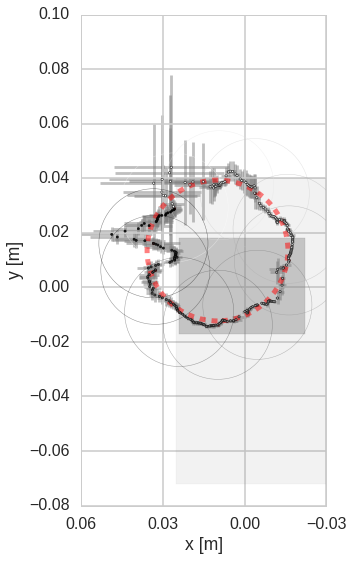

In [67]:
gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06])

In [68]:
print time.shape 
print helicities_by_sigma[sigma]['relative_magnetic'].shape

(250,)
(250,)


# Plot helicities from all filters

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


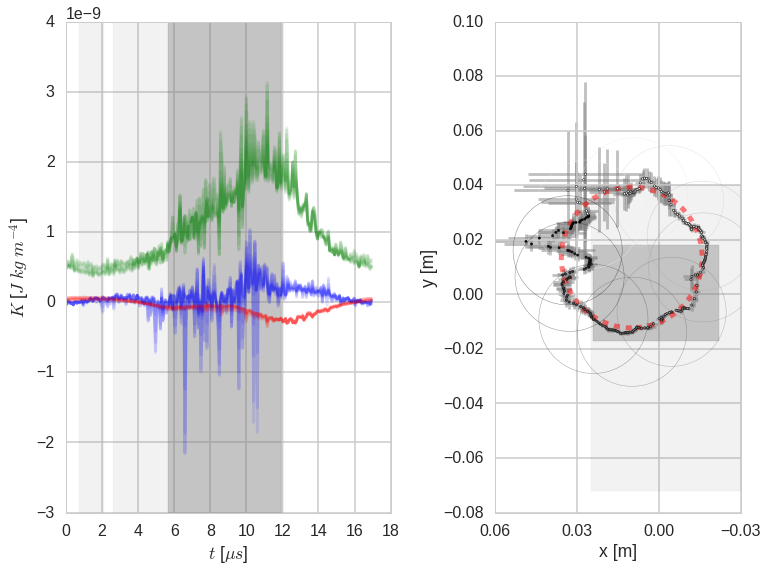

In [69]:
fig, axes = plt.subplots(1, 2)

for i, sigma in enumerate(sigmas):
    axes[0].plot(time, 
             helicities_by_sigma[sigma]['relative_kinetic'], color='blue', alpha=0.1)
    axes[0].plot(time, 
             helicities_by_sigma[sigma]['relative_cross'], color='green', alpha=0.1)
    axes[0].plot(time, 
             helicities_by_sigma[sigma]['relative_magnetic'], color='red', alpha=0.1)

in_dark_box_1 = patches.Rectangle((5.644, -1000),
                                  11.9-5.644, 2000., alpha=0.4, color='grey')
in_light_box_1 = patches.Rectangle((0.748, -1000),
                                   2.108-0.748, 2000., alpha=0.1, color='grey')
in_light_box_2 = patches.Rectangle((2.584, -1000),
                                   12.104-2.584, 2000, alpha=0.1, color='grey')
axes[0].add_patch(in_dark_box_1)
axes[0].add_patch(in_light_box_1)
axes[0].add_patch(in_light_box_2)

    
axes[0].set_xlabel(r'$t$ [$\mu s$]')
axes[0].set_ylabel(r'$K$ [$J$ $kg$ $m^{-4}$]')

gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[1])

# Determine average and standard deviation

In [70]:
relative_kinetic = helicities_by_sigma[0.0]['relative_kinetic'][:, np.newaxis]
relative_cross = helicities_by_sigma[0.0]['relative_cross'][:, np.newaxis]
relative_magnetic = helicities_by_sigma[0.0]['relative_magnetic'][:, np.newaxis]
for sigma in sigmas[0::2]:
    relative_kinetic = np.append(relative_kinetic,
                                 helicities_by_sigma[sigma]['relative_kinetic'][:, np.newaxis],
                                 axis=1)
    relative_cross = np.append(relative_cross,
                               helicities_by_sigma[sigma]['relative_cross'][:, np.newaxis],
                               axis=1)
    relative_magnetic = np.append(relative_magnetic,
                                  helicities_by_sigma[sigma]['relative_magnetic'][:, np.newaxis],
                                  axis=1)
relative_kinetic_mean = np.mean(relative_kinetic, axis=1)
relative_cross_mean = np.mean(relative_cross, axis=1)
relative_magnetic_mean = np.mean(relative_magnetic, axis=1)
relative_kinetic_std = np.std(relative_kinetic, axis=1, ddof=1)
relative_cross_std = np.std(relative_cross, axis=1, ddof=1)
relative_magnetic_std = np.std(relative_magnetic, axis=1, ddof=1)

helicities  = {'time': time,
               'relative_magnetic': relative_magnetic_mean,
               'relative_cross': relative_cross_mean, 
               'relative_kinetic': relative_kinetic_mean}

helicities_std = {'relative_magnetic': relative_magnetic_std,
                  'relative_cross': relative_cross_std, 
                  'relative_kinetic': relative_kinetic_std}

# Plot helicity with uncertainty

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


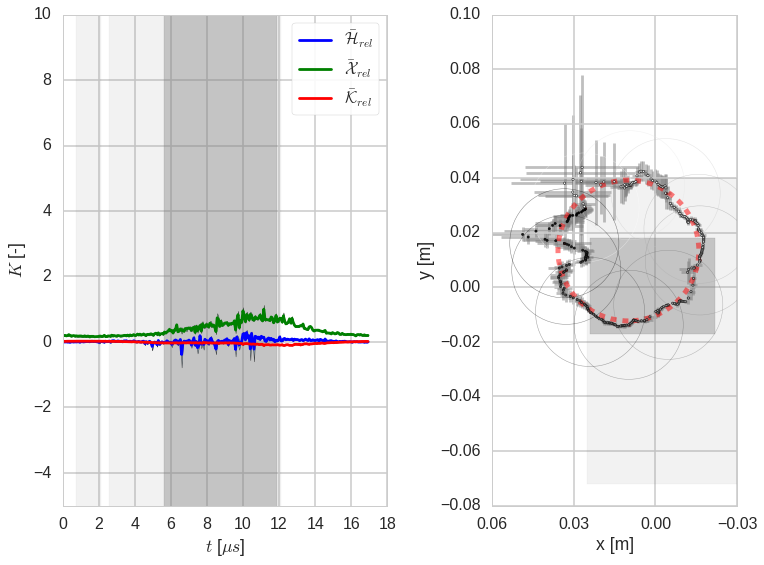

In [71]:
fig, axes = plt.subplots(1, 2)
compare_helicities_mean_std(helicities,
                             helicities_std,
                             S_0_velocity='u_alfven',
                             nondim=True,
                             magnetic=False, kinetic=False, cross=False,
                             normalize='relative_cross',
                             labels_case="dimless",
                             ylim=(-5, 10),
                             add_cross_magnetic=False, axes=axes[0])

gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[1])

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


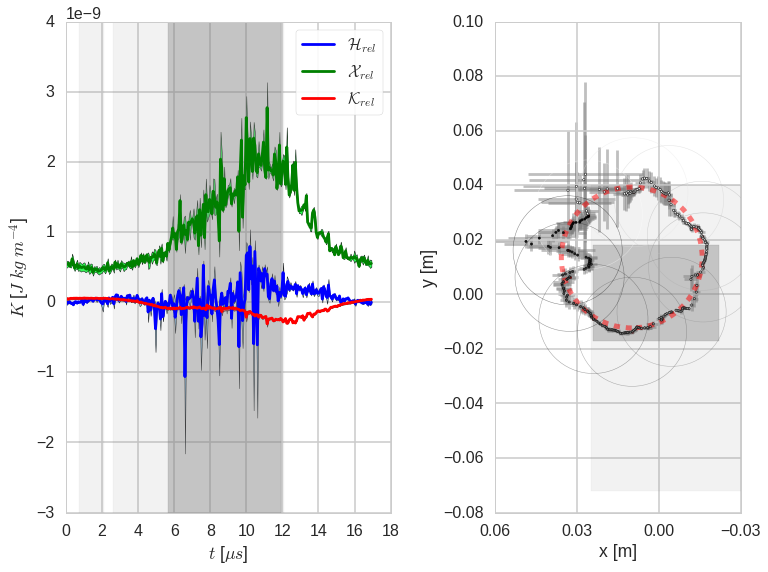

In [72]:
fig, axes = plt.subplots(1, 2)
compare_helicities_mean_std(helicities,
                             helicities_std,
                             S_0_velocity=None,
                             nondim=False,
                             magnetic=False, kinetic=False, cross=False,
                             normalize=False,
                             labels_case="default",
                             add_cross_magnetic=False, axes=axes[0])

gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[1])

# Plot total helicity

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


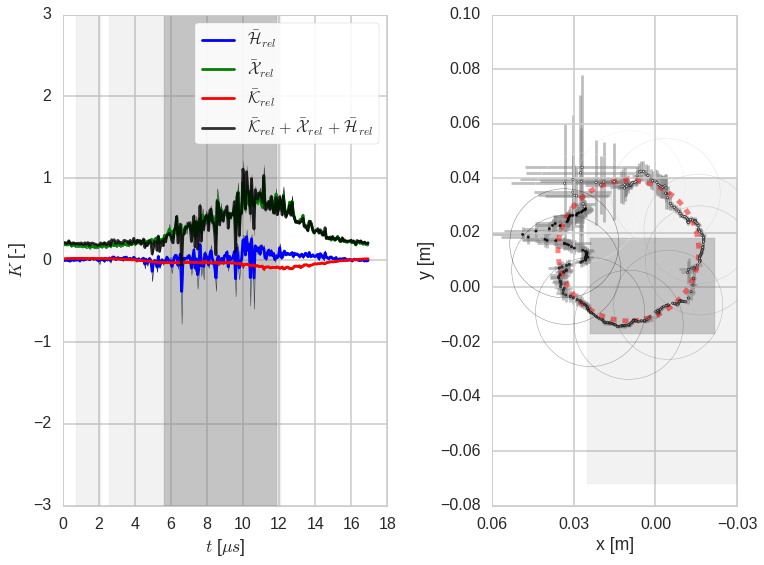

In [73]:
fig, axes = plt.subplots(1, 2)
compare_helicities_mean_std(helicities,
                            helicities_std,
                            S_0_velocity='u_alfven',
                            nondim=True,
                            magnetic=False, kinetic=False, cross=False,
                            normalize='relative_cross',
                            labels_case="dimless",
                            ylim=(-3, 3),
                            add_cross_magnetic=False, add_three=True, axes=axes[0])

gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[1])

# Plot time filtered averge helicity

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


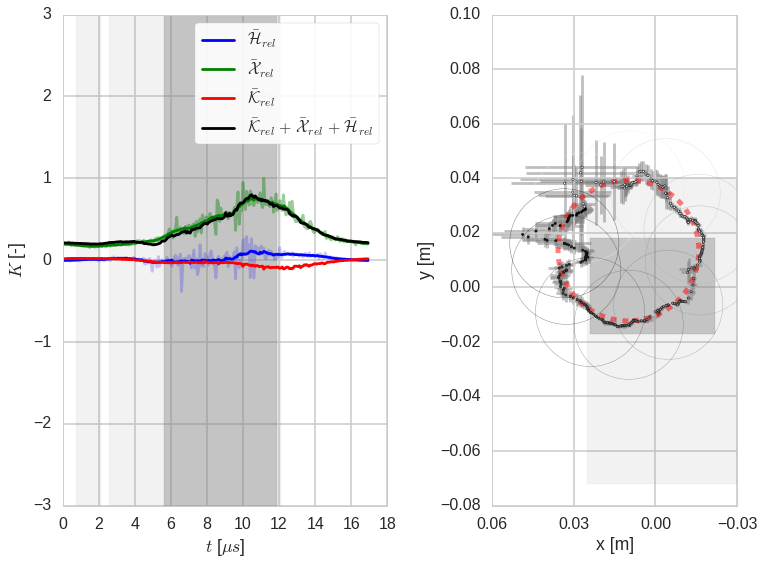

In [74]:
fig, axes = plt.subplots(1, 2)
compare_helicities(helicities, 
                   S_0_velocity='u_alfven',
                   nondim=True,
                   magnetic=False, kinetic=False, cross=False,
                   normalize='relative_cross',
                   labels_case="dimless",
                   filter_width_kinetic=15, 
                   filter_width_cross=15, ylim=(-3, 3),
                   add_cross_magnetic=False, add_three=True, axes=axes[0])
gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[1])

# For talk

0.00992155679827 0.0135060679373 0.0258147197577
(array([ 0.00992156,  0.01350607,  0.02581472]), 1)


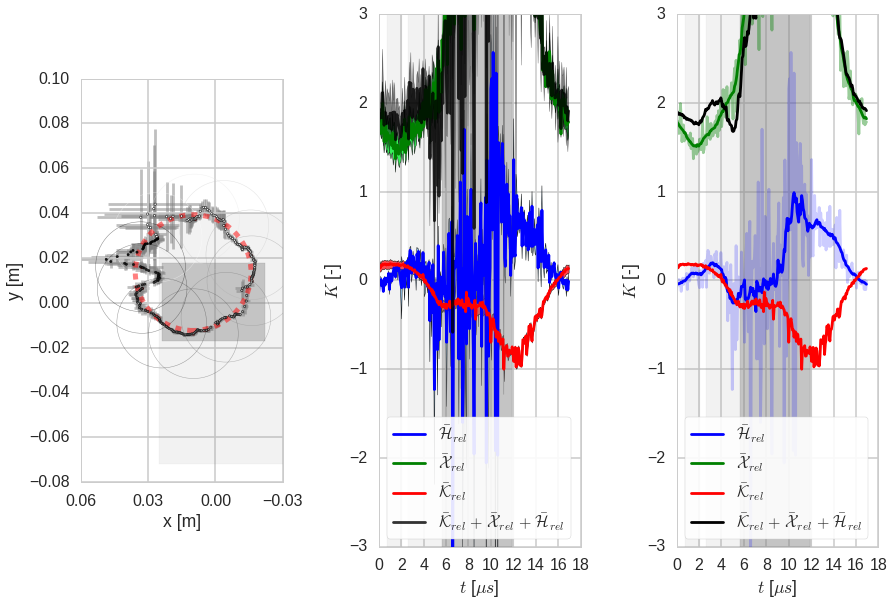

In [60]:
fig, axes = plt.subplots(1, 3)
compare_helicities(helicities, 
                   S_0_velocity='u_alfven',
                   nondim=True,
                   magnetic=False, kinetic=False, cross=False,
                   normalize='relative_cross',
                   labels_case="dimless",
                   filter_width_kinetic=15, 
                   filter_width_cross=15, ylim=(-3, 3),
                   add_cross_magnetic=False, add_three=True, axes=axes[2])
compare_helicities_mean_std(helicities,
                            helicities_std,
                            S_0_velocity='u_alfven',
                            nondim=True,
                            magnetic=False, kinetic=False, cross=False,
                            normalize='relative_magnetic',
                            labels_case="dimless",
                            ylim=(-3, 3),
                            add_cross_magnetic=False, add_three=True, axes=axes[1])
gyration_path(points=points_average, errors=points_std, errorevery=1,
              circle_fit=True, xlim=(-0.03, 0.06), circles=True, 
              xticks=[-0.03, 0.0, 0.03, 0.06], axes=axes[0])
plt.tight_layout()